# Leitura da ImageNet Mobile a partir de uma rede Caffe

In [12]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

## Verificação do setup de OpenCV e Diretório

In [13]:
cv2.__version__

'4.1.1'

In [14]:
os.getcwd()

'/home/leviosa/documents/insper/wl_robot20/aula03'

In [15]:
proto = "./mobilenet_detection/MobileNetSSD_deploy.prototxt.txt"
model = "./mobilenet_detection/MobileNetSSD_deploy.caffemodel"

## Instanciação da rede neural:

In [16]:
net = cv2.dnn.readNetFromCaffe(proto, model)


## Categorias da  MobileNet

In [17]:
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]

## Leitura da imagem

In [18]:
img = cv2.imread("cat_bike.png")
CONFIDENCE = 0.7
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

### Engine de deteção

In [19]:
def detect(frame):
    """
        Recebe - uma imagem colorida
        Devolve: objeto encontrado
    """
    image = frame.copy()
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

    # pass the blob through the network and obtain the detections and
    # predictions
    print("[INFO] computing object detections...")
    net.setInput(blob)
    detections = net.forward()

    results = []

    # loop over the detections
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence


        if confidence > CONFIDENCE:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # display the prediction
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(image, (startX, startY), (endX, endY),
                COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

            results.append((CLASSES[idx], confidence*100, (startX, startY),(endX, endY) ))

    # show the output image
    return image, results

Vamos executar a deteção

In [20]:
saida, resultados = detect(img)

[INFO] computing object detections...
[INFO] bicycle: 99.99%
[INFO] bicycle: 99.96%
[INFO] cat: 99.83%


E iterar sobre os resultados. Os resultados contém a categoria, os pontos do retângulo que identificam o objeto encontrado e  nível de certeza da classificação.

In [21]:
resultados

[('bicycle', 99.9937891960144, (698, 62), (1185, 361)),
 ('bicycle', 99.9582827091217, (76, 471), (508, 735)),
 ('cat', 99.82733726501465, (78, 47), (537, 363))]

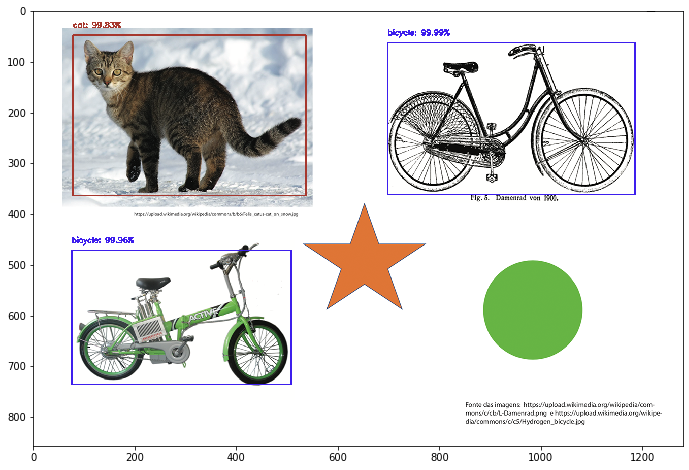

In [11]:
saida_rgb = cv2.cvtColor(saida, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.imshow(saida_rgb)